# Lab3 - Mushroom Classification
Author: *Ryan Baker*


In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We are going to follow the following workflow: Split data into training and test set. Use the training portion to find the best model (optionally using grid search) and cross-validation. Evaluate the *winner* on the test set.

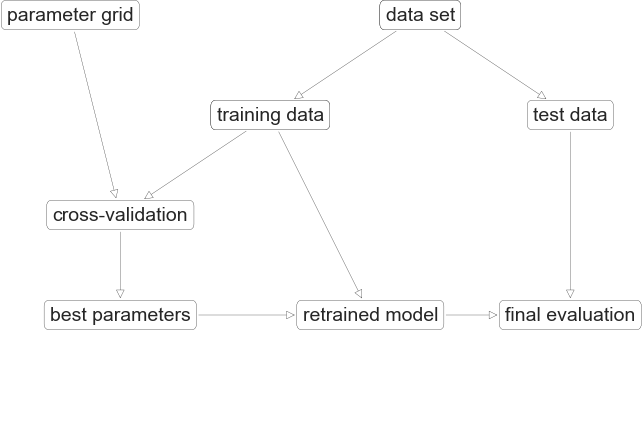

In [107]:
import mglearn
mglearn.plots.plot_grid_search_overview()

## 0. Function definitions

In [108]:
from sklearn.model_selection import cross_validate


def get_classifier_cv_score(model, X, y, scoring='accuracy', cv=7):
    '''Calculate train and validation scores of classifier (model) using cross-validation
        
        
        model (sklearn classifier): Classifier to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        scoring (str): a scoring string accepted by sklearn.metrics.cross_validate()
        cv (int): number of cross-validation folds see sklearn.metrics.cross_validate()
        
        returns: mean training score, mean validation score
    
    '''
    
     #TODO: implement function body
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=True)
    return (scores['train_score'].mean(), scores['test_score'].mean())    

In [109]:
# OPTIONAL METHOD
def print_grid_search_result(grid_search):
    '''Prints summary of best model from GridSearchCV object.
    
        For the best model of the grid search, print:
        - parameters 
        - cross-validation training score
        - cross-validation validation score 
        
        scores are printed with 3 decimal places.
    
        grid_search (sklearn GridSearchCV): Fitted GridSearchCV object
        
        returns: None
        
    '''
    
     #TODO: implement function body
    

In [110]:
import mglearn

def plot_grid_search_results(grid_search):
    '''For grids with 2 hyperparameters, create a heatmap plot of test scores
        
        grid_search (sklearn GridSearchCV): Fitted GridSearchCV object
        
        uses mglearn.tools.heatmap() for plotting.
    
    '''
    results = pd.DataFrame(grid_search.cv_results_)

    params = sorted(grid_search.param_grid.keys())
    
    assert len(params) == 2, "We can only plot two parameters."
    
    # second dimension in reshape are rows, needs to be the fast changing parameter
    scores = np.array(results.mean_test_score).reshape(len(grid_search.param_grid[params[0]]),
                                                      len(grid_search.param_grid[params[1]]))

    # plot the mean cross-validation scores
    # x-axis needs to be the fast changing parameter
    mglearn.tools.heatmap(scores, 
                          xlabel=params[1], 
                          xticklabels=grid_search.param_grid[params[1]], 
                          ylabel=params[0], 
                          yticklabels=grid_search.param_grid[params[0]],
                          cmap="viridis", fmt="%0.3f")

In [167]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_actual, y_pred, labels, title=''):
    '''Creates a heatmap plot of the confusion matrix.
    
        y_actual (pandas.DataSeries or numpy.Array): Ground truth label vector
        y_pred (pandas.DataSeries or numpy.Array): Predicted label vector
        labels (list(str)): Class names used for plotting (ticklabels)
        title (str): Plot title
        
        uses sklearn.metrics.confusion_matrix
        
    '''
    
    #TODO: implement function body
    matrix = confusion_matrix(y_actual, y_pred, labels=labels)
    conf_mat_map = sns.heatmap(matrix, square=True, annot=True, cbar=False, fmt='d', xticklabels=labels, yticklabels=labels)
    conf_mat_map.set_title(title)
    plt.xlabel('Predicted Value')
    plt.ylabel('True Value')
    plt.show()
   

## 1. Load data
yellowbrick mushroom  
https://www.scikit-yb.org/en/latest/api/datasets/mushroom.html




### 1.1 Prepare the feature matrix and target vector

Using the yellowbrick `load_mushroom()` function, load the mushroom data set into feature matrix `X` and target vector `y`.

Print shape and type of `X`, `y`.

In [112]:
# TODO: add data loading code
from yellowbrick.datasets import load_mushroom
X, y = load_mushroom()
print(f'X: {X.shape} {type(X)}')
print(f'y: {y.shape} {type(y)}')


X: (8123, 3) <class 'pandas.core.frame.DataFrame'>
y: (8123,) <class 'pandas.core.series.Series'>


## 2. Inspect the data 

### 2.1 Relationship between features and target classes

To understand the relationship between categorical features and target classes better, it is usefull to produce barplots with bars for each target class. Using seaborn `countplot()`, produce a barplot for each of the three feature columns in `X` using  `y` as hue.

<AxesSubplot:xlabel='color', ylabel='count'>

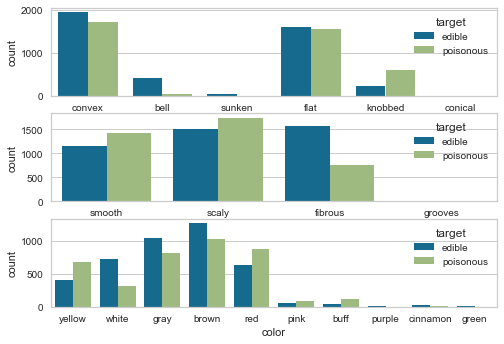

In [113]:
# TODO: add countplots for each feature.
plt.subplot(3, 1, 1)
sns.countplot(x=X['shape'], hue=y)
plt.subplot(3, 1, 2)
sns.countplot(x=X['surface'], hue=y)
plt.subplot(3, 1, 3)
sns.countplot(x=X['color'], hue=y)



## 3. Preprocessing
In this dataset, all features are discrete and nominal and need to be encoded. You will use a `OneHotEncoder`.

The target vector is discrete and nominal as well. While sklearn is OK using string labels, you will use a `LabelEncoder` to convert strings to integers and keep the encoder to translate between the two representations.

### 3.1 Onehot encoding of features
Use `OneHotEncoder` to convert `X` into one-hot-encoded features stored in a varible `X_enc`. Use `sparse=False`. Print shape of `X_enc`.

In [114]:
# TODO: add OneHotEncoder here
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
X_enc = encoder.fit_transform(X)
print(X_enc.shape)


(8123, 20)


### 3.2 Label encode target vector 
Use `LabelEncoder` to encode the target vector `y`, saved in a varibale `y_enc`.

Print the resulting target vector `y_enc` and print the class names available in the `classes_` attribute of the `LabelEncoder` object.

In [115]:
# TODO: add LabelEncoder here
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_enc = label_encoder.fit_transform(y)
print(f'encoded target {y_enc}')
print(f'classes {label_encoder.classes_}')

encoded target [0 0 1 ... 0 1 0]
classes ['edible' 'poisonous']


### *Question 1:* How are class label strings mapped to integers? Show an example for both.
Hint: use `transform()` or `inverse_transform()` method of the `LabelEncoder` object.

*A unique integer is mapped to each unique string. In this case, integer 0 is assigned to 'edible', and integer 1 is assigned to 'poisonous'. This can be shown by comparing the encoded target to the strings that were used to make the encoding (shown below)*

In [116]:
print(f'encoded target {y_enc}')
print(f'original strings {label_encoder.inverse_transform(y_enc)}')

encoded target [0 0 1 ... 0 1 0]
original strings ['edible' 'edible' 'poisonous' ... 'edible' 'poisonous' 'edible']


## 4. Create training and test sets
Using scikit-learn `train_test_split()` with parameters `random_state=37`, `test_size=0.2`, split `X_enc` and `y_enc` into training and test sets.

In [117]:
# TODO: add train_test_split() here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_enc, random_state = 37, test_size=0.2)

## 5. Compare models using cross-validation
Create a list containing a `LogisticRegression()`, 
          `SVC()`,
          `BernoulliNB()`,
        `RandomForestClassifier(random_state=55)`, 
         `GradientBoostingClassifier(random_state=56)` objects.

Iterate this list, then:
- compute the **average precision** using `get_classifier_cv_score()` defined above, 
- rank the models based on validation **average precision** (best first),
- and print the ranked models training and validation scores with **3 decimal places**. 

Use training data and 7-fold cross-validation.

In [118]:
# TODO: add cross-validation comparison here
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

models = [LogisticRegression(), SVC(), BernoulliNB(), RandomForestClassifier(random_state=55), GradientBoostingClassifier(random_state=56)]
scores = []
for model in models:
    scores.append((model, get_classifier_cv_score(model, X_train, y_train)))
scores = sorted(scores, key=lambda x: x[1][0], reverse=True)

for i, score in enumerate(scores):
    print(f'{scores[i][0]} training_score={scores[i][1][0]:.3f} validation_score={scores[i][1][1]:.3f}')


    

RandomForestClassifier(random_state=55) training_score=0.720 validation_score=0.707
SVC() training_score=0.720 validation_score=0.708
GradientBoostingClassifier(random_state=56) training_score=0.711 validation_score=0.701
LogisticRegression() training_score=0.667 validation_score=0.667
BernoulliNB() training_score=0.627 validation_score=0.626


## 6. (optional) Hyperparameter tuning using grid search 

The inital cross-validation above showed that both DecisionTree based models might have merit. 

Support vector machine classifier might also perform well if properly tuned.

Next, hyperparameters are tuned using grid search.

### 6.1 Grid search for RandomForestClassifier 

Perform grid search using `GridSearchCV` for the `RandomForestClassifier(random_state=55)`.

Grid search to use 7-fold cross-validation, and `average_precision` as the scoring function. Note that there is a `n_jobs` parameter to run search in parallel. Setting it to the number of CPU cores works well.

Use the following hyperparameters and values:
- `'n_estimators': [300, 500, 700, 1000]`
- `'max_depth': [7, 9, 11, 13]`

Use `print_grid_search_result()` and `plot_grid_search_result()` functions defined above to show the results.

In [119]:
# TODO: Setup grid search for RandomForestClassifier(random_state=55)


In [120]:
# TODO: perform the grid search by calling fit()


In [121]:
# TODO: call print_grid_search_result() to print the results


In [122]:
# TODO: call plot_grid_search_results() to plot validation metrics for all hyperparameter combinations


### 6.2 Gradient boosting classifier 
Perform grid search using `GridSearchCV` for the `GradientBoostingClassifier(max_depth=5, random_state=56)`.

Grid search to use 7-fold cross-validation, and `average_precision` as the scoring function. Note that there is a `n_jobs` parameter to run search in parallel. Setting it to the number of CPU cores works well.

Use the following hyperparameters and values:
- `'n_estimators': [50, 100, 200]`,
- `'learning_rate': [0.001, 0.01, 0.1, 1.0]`

Use `print_grid_search_result()` and `plot_grid_search_result()` functions defined above to show the results.

In [123]:
# TODO: Setup grid search for GradientBoostingClassifier(max_depth=5, random_state=56)


In [124]:
# TODO: perform the grid search by calling fit()


In [125]:
# TODO: call print_grid_search_result() to print the results


In [126]:
# TODO: call plot_grid_search_results() to plot validation metrics for all hyperparameter combinations


### 6.3 SVC grid search
Perform grid search using `GridSearchCV` for the `SVC()`.

Grid search to use 7-fold cross-validation, and `average_precision` as the scoring function. Note that there is a `n_jobs` parameter to run search in parallel. Setting it to the number of CPU cores works well.

Use the following hyperparameters and values:
- `'C': [0.0001, 0.001, 0.01, 0.1]`
- `'gamma': [0.1, 1, 10, 100]`

Use `print_grid_search_result()` and `plot_grid_search_result()` functions defined above to show the results.

In [127]:
# TODO: Setup grid search for SVC()


In [128]:
# TODO: perform the grid search by calling fit()


In [129]:
# TODO: call print_grid_search_result() to print the results


In [130]:
# TODO: call plot_grid_search_results() to plot validation metrics for all hyperparameter combinations


### *Question 2:* What are the training and validation scores of the three tuned (best) models? Summarize the results here.

## Before Grid Search:

| Model |  Training Score | Validation Score |
| --- | --- | --- |
| Random Forest Classifier | 0.720 | 0.707 |
| SVC | 0.720 | 0.708 |
| Gradient Boosting Classifier | 0.711 | 0.701|
| Logistic Regression | 0.667 | 0.667 |
| Bernoulli NB | 0.627 | 0.626 | 

<br />

## After Grid Search:

| Model |  Training Score | Validation Score |
| --- | --- | --- |
| Random Forest Classifier | 0.806 | 0.794 |
| Gradient Boosting Classifier | 0.806 | 0.795 |
| SVC | 0.779 | 0.772 |

The best three models after tuning hyperparameters with grid search are (in descending order) *Gradient Boosting Classifier*, *Random Forest Classifier*, and *SVC*.

## 7. (optional) Best model: Find a better threshold

### 7.1 Precision and recall curve

From the results above, it looks like `GradientBoosingClassifier()` performs well.

Using the training dataset and best `GradientBoosingClassifier()` from the grid search above:
1. Calculate predicted probabilities using `cross_val_predict()` with parameters `cv=7, method='predict_proba'`.
2. Plot the precision-recall curve indicating where the default threshold 0.5 lies (see lecture notebook for an example).

Include a legend and axis labels.


In [131]:
#TODO: Calculate predicted probabilities using cross_val_predict(cv=7, method='predict_proba')


In [132]:
#TODO: Plot precision-recall curve


### 7.2 Find a better threshold
It is important in this application to achieve high recall. Determine the probability threshold to achieve recall higher than 0.999. Store this threshold in a variable and print it.

In [133]:
#TODO: Find and print threshold for recall>0.999


## 8. Retrain best model
Retrain the best `GradientBoostingClassifier()` from the grid search above on the training dataset.

In [134]:
#TODO: Retrain gradient boosting classifier
model = GradientBoostingClassifier(max_depth=5, random_state=56, learning_rate=0.1, n_estimators=100)
model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, random_state=56)

## 9. Evaluate on test data

Using the retrained model and the test dataset:
- print the classification report
- plot the confusion matrix using plot_confusion_matrix()

Make sure the plot has class labels and a title.

Repeat these steps for the default threshold and the optimal threshold determined in step 7.

### 9.1 Evaluation with default threshold

In [135]:
#TODO: print classification report using default threshold
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72       843
           1       0.71      0.63      0.67       782

    accuracy                           0.70      1625
   macro avg       0.70      0.69      0.69      1625
weighted avg       0.70      0.70      0.70      1625



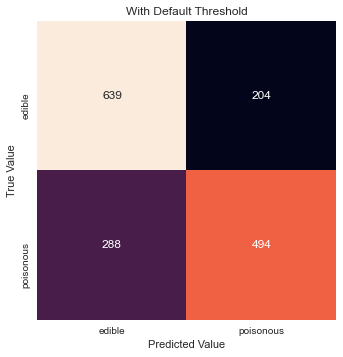

In [168]:
#TODO: call plot_confusion_matrix(), use LabelEncoder classes_ to get labels
y_test_enc = label_encoder.inverse_transform(y_test)
y_pred_enc = label_encoder.inverse_transform(y_pred)

conf_matr = plot_confusion_matrix(y_test_enc, y_pred_enc, labels=label_encoder.classes_, title='With Default Threshold')




### 9.2 (optional) Evaluation with new threshold form Step 7.

In [33]:
#TODO: print classification report using default threshold


              precision    recall  f1-score   support

           0       1.00      0.10      0.19       843
           1       0.51      1.00      0.67       782

    accuracy                           0.54      1625
   macro avg       0.75      0.55      0.43      1625
weighted avg       0.76      0.54      0.42      1625



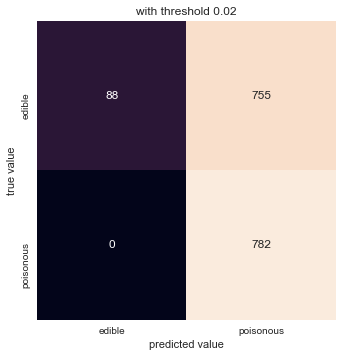

In [34]:
#TODO: call plot_confusion_matrix(), use LabelEncoder classes_ to get labels


### *Question 3:* What are the precision, recall and accuracy on the test set using the default and optimal thresholds of the best gradient boosting model?

$precision = \frac{TP}{TP+FP}$ <br /><br />
$recall = \frac{TP}{TP+FN}$ <br /><br />
$accuracy = \frac{TP+TN}{TP+TN+FP+FN}$ 






In [181]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0,1]).ravel()
print('Default Threshold:')
print(f'True Negatives: {tn}')
print(f'False Positives: {fp}')
print(f'False Negatives: {fn}')
print(f'True Positives: {tp}')
print(f'Precision: {(tp)/(tp + fp):.3}')
print(f'Recall: {(tp)/(tp + fn):.3}')
print(f'Accuracy: {(tp + tn)/(tp + tn + fp + fn):.3}')

tn, fp, fn, tp = [88, 755, 0, 782]
print()
print('Optimal Threshold:')
print(f'True Negatives: {tn}')
print(f'False Positives: {fp}')
print(f'False Negatives: {fn}')
print(f'True Positives: {tp}')
print(f'Precision: {(tp)/(tp + fp):.3}')
print(f'Recall: {(tp)/(tp + fn):.3}')
print(f'Accuracy: {(tp + tn)/(tp + tn + fp + fn):.3}')




Default Threshold:
True Negatives: 639
False Positives: 204
False Negatives: 288
True Positives: 494
Precision: 0.708
Recall: 0.632
Accuracy: 0.697

Optimal Threshold:
True Negatives: 88
False Positives: 755
False Negatives: 0
True Positives: 782
Precision: 0.509
Recall: 1.0
Accuracy: 0.535


### *Question 4:* How many false negatives does the model produce on the test set with the default and optimal thresholds of the best gradient boosting model?

| |False Negatives|
|---:|---:|
|Default Threshold| 288|
|Optimal Threshold| 0|

## 10. Conclusion

In conclusion, comment on the following items:
1. In the classification of edible vs poisonous mushrooms, why is high recall desired?
   - *Because it could be deadly to classify a poisonous mushroom as edible (ie. we want to avoid false negatives).*
1. In the classification of edible vs poisonous mushrooms, what do false positive and false negative predictions imply and what are the consequences of making these mistakes?
   - *False positive implies that we have classified an edible mushroom as poisonous.*
   - *False negative implies that we have classified a poisonous mushroom as edible.*
   - *The consequence of a false positive in this context would be that an edible mushroom is classified as poisonous, and people using this model would miss out on mushrooms that are edible.*
   - *The consequence of a false negative could be deadly.*
1. Is the final model satisfactory, i.e. a useful model for the task, or is more work needed? Explain.
   - *In the final model (with optimized threshold), the accuracy is only 0.535, which means the model is only correct 53.5% of the time. I personally would not use a model if it was only correct half of the time.*

## 11. Reflection
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating while working on this assignment.

**Likes:**
- If I would have had more time, I would have really enjoyed using grid search. That seems extremely useful. Regardless, it was nice to have to answer the questions in the lab and see the outcome of it without having to do the work (the lab was already fairly lengthy, and I appreciated only having to answer the questions). This was a good balance between doing unnecessary work and maximizing learning.
- I liked the mushroom dataset. It was simple to see what the objective was!

**Dislikes:**
- I struggled with the seaborn heatmap for some reason. It took me awhile to find the xticklabels and yticklabels parameters. But I know how to do it now!

